# **Tugas 2 Image Processing**

### Konvolusi menggunakan Linear Filter
Konvolusi adalah operasi matematika yang digunakan dalam pemrosesan citra untuk menerapkan filter pada gambar. Proses ini melibatkan perkalian elemen-elemen dari sebuah kernel (filter) dengan nilai piksel di sekitarnya dalam gambar, kemudian menjumlahkan hasilnya untuk menghasilkan nilai piksel baru.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Proses Konvolusi

In [11]:
def apply_convolution(image, kernel, kernel_name):
    """Melakukan konvolusi pada citra grayscale dengan kernel tertentu."""
    img_array = np.array(image, dtype=np.float32)
    h, w = img_array.shape
    k_size = kernel.shape[0]
    pad = k_size // 2

# Padding citra
    padded_img = np.pad(img_array, pad, mode='constant', constant_values=0)
    output = np.zeros((h, w), dtype=np.float32)

    # Proses konvolusi
    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+k_size, j:j+k_size]
            output[i, j] = np.sum(region * kernel)

    # Menampilkan contoh perhitungan pada satu region (tengah gambar)
    mid_h, mid_w = h // 2, w // 2
    region_example = padded_img[mid_h:mid_h+k_size, mid_w:mid_w+k_size]
    conv_result = np.sum(region_example * kernel)
    print(f"\nKernel: {kernel_name}")
    print("Region 5x5:")
    print(region_example)
    print(f"Hasil konvolusi dengan {kernel_name} pada region tersebut: {conv_result}")

    return np.clip(output, 0, 255).astype(np.uint8)

# Membaca gambar dari file
image_path = "kucing.jpg"
image_pil = Image.open(image_path).convert("L")  # Konversi ke grayscale
image = np.array(image_pil)

### Kernel 5x5


Kernel: Rataan 5x5
Region 5x5:
[[ 34.  64.  76. 121. 187.]
 [ 61. 103. 111. 174. 189.]
 [119. 176. 179. 193. 175.]
 [123. 176. 190. 185. 178.]
 [111. 142. 205. 209. 204.]]
Hasil konvolusi dengan Rataan 5x5 pada region tersebut: 147.39999389648438


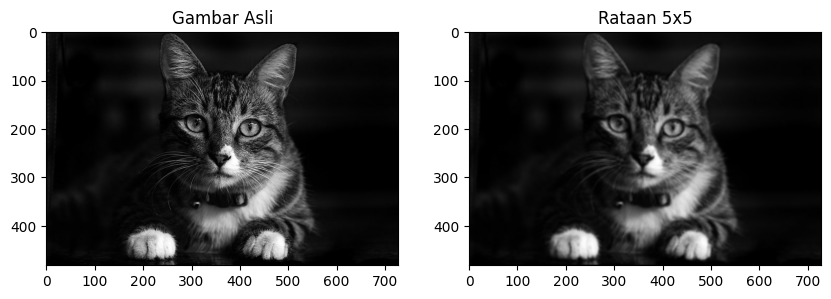

In [12]:
# Kernel Rataan 5x5
kernel_rataan = np.ones((5, 5), dtype=np.float32) / 25
result_rataan = apply_convolution(image, kernel_rataan, "Rataan 5x5")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Gambar Asli")
plt.subplot(1,2,2), plt.imshow(result_rataan, cmap='gray'), plt.title("Rataan 5x5")
plt.show()

### Kernel Sharpen


Kernel: Sharpen
Region 5x5:
[[103. 111. 174.]
 [176. 179. 193.]
 [176. 190. 185.]]
Hasil konvolusi dengan Sharpen pada region tersebut: 225.0


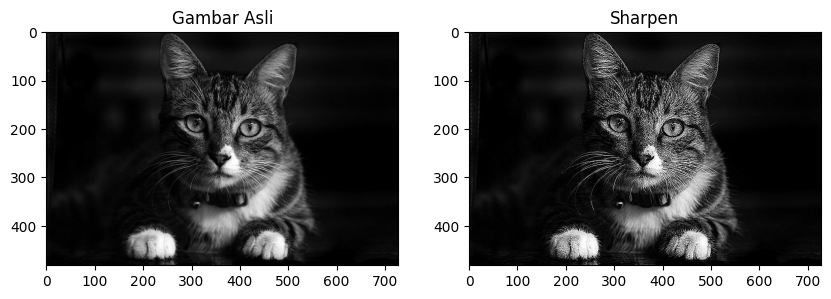

In [13]:
# Kernel Sharpen
kernel_sharpen = np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]], dtype=np.float32)
result_sharpen = apply_convolution(image, kernel_sharpen, "Sharpen")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Gambar Asli")
plt.subplot(1,2,2), plt.imshow(result_sharpen, cmap='gray'), plt.title("Sharpen")
plt.show()

### Kernel Edge Detection


Kernel: Edge Detection
Region 5x5:
[[103. 111. 174.]
 [176. 179. 193.]
 [176. 190. 185.]]
Hasil konvolusi dengan Edge Detection pada region tersebut: 124.0


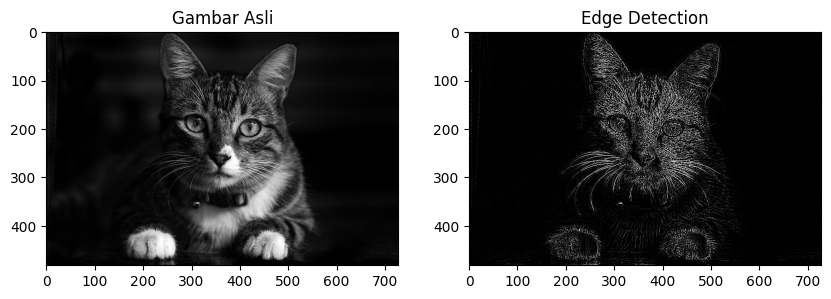

In [14]:
# Kernel Edge Detection
kernel_edge = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]], dtype=np.float32)
result_edge = apply_convolution(image, kernel_edge, "Edge Detection")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Gambar Asli")
plt.subplot(1,2,2), plt.imshow(result_edge, cmap='gray'), plt.title("Edge Detection")
plt.show()

### Kernel Emboss


Kernel: Emboss
Region 5x5:
[[103. 111. 174.]
 [176. 179. 193.]
 [176. 190. 185.]]
Hasil konvolusi dengan Emboss pada region tersebut: 439.0


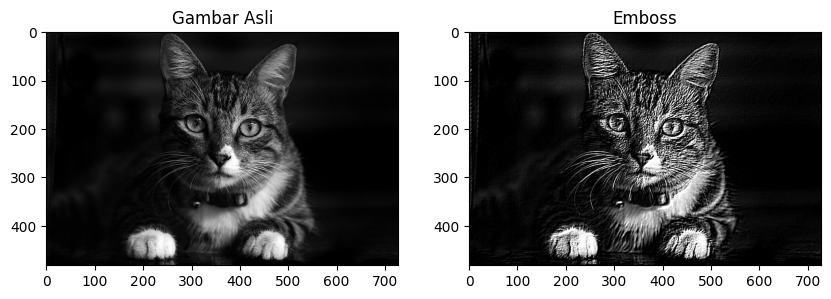

In [15]:
# Kernel Emboss
kernel_emboss = np.array([[-2, -1,  0],
                           [-1,  1,  1],
                           [ 0,  1,  2]], dtype=np.float32)
result_emboss = apply_convolution(image, kernel_emboss, "Emboss")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Gambar Asli")
plt.subplot(1,2,2), plt.imshow(result_emboss, cmap='gray'), plt.title("Emboss")
plt.show()